In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/statistics/lesson_10/dating_data.csv')

In [3]:
df.head()

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1


# 1

Посмотрим метрику - мэтчи (кол-во) в группах

Переменная конверсионная используем метод ХИ-квадрат

In [4]:
from scipy.stats import chi2_contingency

In [5]:
cross_table = pd.crosstab(df.group, df.is_match)

In [6]:
cross_table

is_match,0,1
group,,
0,3858,934
1,5813,3909


In [7]:
# Применение хи-квадрат теста
chi2, p_value, dof, expected = chi2_contingency(cross_table)

# Вывод значения
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 618.6889141576198
P-value: 1.4418299163662586e-136
Degrees of freedom: 1
Expected frequencies: [[3193.01584677 1598.98415323]
 [6477.98415323 3244.01584677]]


In [8]:
# p-value меньше 0,05, значит различия значимы 

In [9]:
# посмотрим на графики распределения

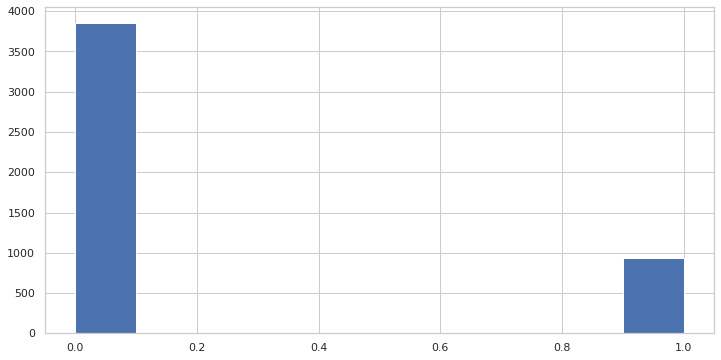

In [15]:
df.query('group == 0').is_match.hist() # результаты старого алгоритма

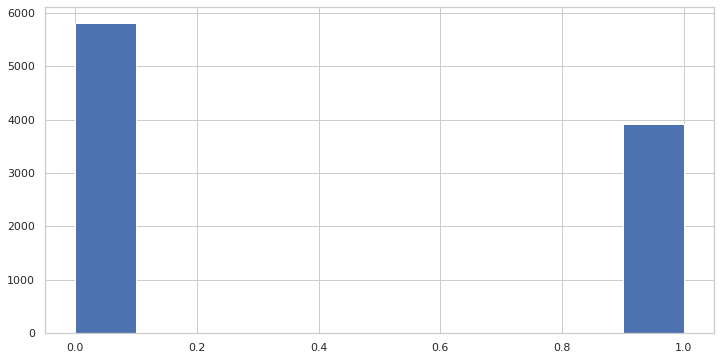

In [16]:
df.query('group == 1').is_match.hist() # результаты нового алгоритма

Посчитаем % мэтчей относительного всего числа мэтчей в тесте и контроле. 
И определим насколько по модулю отличаются эти группы

In [19]:
df.query('group == 0 and is_match == 1').count() * 100 / df.query('group == 0').count() 

user_id_1    19.490818
user_id_2    19.490818
group        19.490818
is_match     19.490818
dtype: float64

In [20]:
df.query('group == 1 and is_match == 1').count() * 100 / df.query('group == 1').count() 

user_id_1    40.207776
user_id_2    40.207776
group        40.207776
is_match     40.207776
dtype: float64

In [22]:
40.207776 - 19.490818 # Абсолютное изменение в %

20.716958

In [24]:
(40.207776 - 19.490818) / 19.490818 * 100 #Относительное изменение

106.29085962426

# Вывод: новый алгоритм улучшил работу сервиса в два раза

# 2

### Ниже, если успею: Посмотрим метрику - активность пользователей

Проверим: какие ещё есть интересности в данных

In [26]:
df

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1
...,...,...,...,...
14509,476,631,0,0
14510,455,770,1,0
14511,260,6,1,1
14512,885,812,1,1


In [27]:
df.nunique()

user_id_1    1000
user_id_2    1000
group           2
is_match        2
dtype: int64

In [56]:
df_control = df.query('group == 0').groupby(['user_id_1', 'user_id_2'], as_index=False).agg(count_user=('user_id_1', 'count')).sort_values(by='count_user', ascending=False)

In [57]:
df_control

,user_id_1,user_id_2,count_user
0,4,466,1
3200,659,613,1
3198,659,517,1
3197,659,511,1
3196,659,237,1
...,...,...,...
1597,332,711,1
1596,332,533,1
1595,332,446,1
1594,332,259,1


In [54]:
df_test = df.query('group == 1').groupby('user_id_2', as_index=False).agg(count_user=('user_id_2', 'count')).sort_values(by='count_user', ascending=False)

In [55]:
df_test

,user_id_2,count_user
347,716,34
117,238,34
388,787,33
492,981,32
155,314,31
...,...,...
394,804,9
2,3,9
471,934,9
459,915,8


Посмотрим метрику - активность пользователей

Переменная конверсионная используем метод ХИ-квадрат

In [ ]:
cross_table2 = pd.crosstab(df.group, df.is_match)